In [1]:
                        ###########################################################
                        ## Machine Predictive Maintenance Classification Dataset ##
                        ###########################################################
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Leer .csv y creo un DF
df = pd.read_csv('Base1_predictive_maintenance.csv', delimiter=",")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
# tipos, valores nulos, columnas, filas, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
# Estadistica descriptiva
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
#Revisamos si la data esta desbalanceada
print(df["Target"].value_counts())

0    9661
1     339
Name: Target, dtype: int64


In [6]:
#Revisamos si la data esta desbalanceada
print(df["Failure Type"].value_counts())

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64


In [7]:
# Buscar variables categoricas type== object
    # Variable Failure Type es catergorica, pero TARGET SEGUN descripcion_Base1.txt .
categorical= []
for aux in df.columns:
  if df[aux].dtypes== 'object':
    categorical.append(aux)
categorical

['Product ID', 'Type', 'Failure Type']

In [10]:
#Distr de los datos, V. categoricas
for cat in  categorical:
    print(cat)
    print(df[cat].value_counts())

Product ID
L48812    1
M21766    1
L50700    1
L50716    1
M24139    1
         ..
L53901    1
H38784    1
L49989    1
L47736    1
M18912    1
Name: Product ID, Length: 10000, dtype: int64
Type
L    6000
M    2997
H    1003
Name: Type, dtype: int64
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64


C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


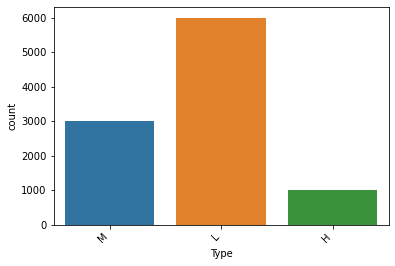

In [11]:
# ¿No tiene sentido el countplot de Product ID?
draw = sns.countplot(df["Type"])
draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
plt.show()

C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


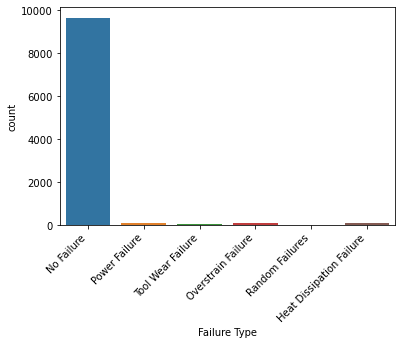

In [12]:
  draw = sns.countplot(df["Failure Type"])
  draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
  plt.show()

In [21]:
df.groupby(['Product ID','Type'])['Failure Type'].value_counts()

Product ID  Type  Failure Type
H29424      H     No Failure      1
H29425      H     No Failure      1
H29432      H     No Failure      1
H29434      H     No Failure      1
H29441      H     No Failure      1
                                 ..
M24849      M     No Failure      1
M24851      M     No Failure      1
M24855      M     No Failure      1
M24857      M     No Failure      1
M24859      M     No Failure      1
Name: Failure Type, Length: 10000, dtype: int64

In [22]:
df.groupby(['Type'])['Failure Type'].value_counts()

Type  Failure Type            
H     No Failure                   979
      Heat Dissipation Failure       8
      Tool Wear Failure              6
      Power Failure                  5
      Random Failures                4
      Overstrain Failure             1
L     No Failure                  5757
      Heat Dissipation Failure      74
      Overstrain Failure            73
      Power Failure                 59
      Tool Wear Failure             25
      Random Failures               12
M     No Failure                  2916
      Power Failure                 31
      Heat Dissipation Failure      30
      Tool Wear Failure             14
      Overstrain Failure             4
      Random Failures                2
Name: Failure Type, dtype: int64

C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


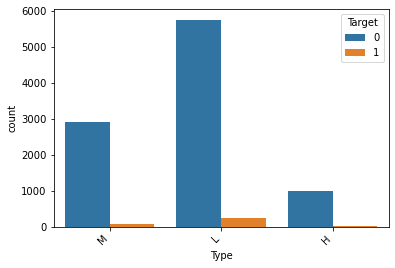

In [24]:
draw = sns.countplot(df["Type"], hue= df['Target'])
draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
plt.show()

C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


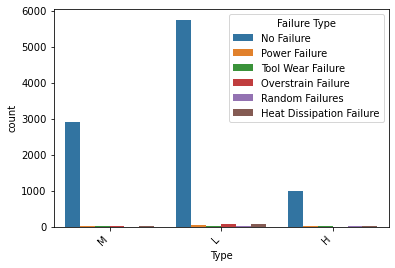

In [6]:
draw = sns.countplot(df["Type"], hue= df['Failure Type'])
draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [13]:
# Variables Numericas
num = []
for aux in df.columns:
  if df[aux].dtypes == 'float64' or df[aux].dtypes == 'int64':
    num.append(aux)
num.pop() # Elimino variable Target
num

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

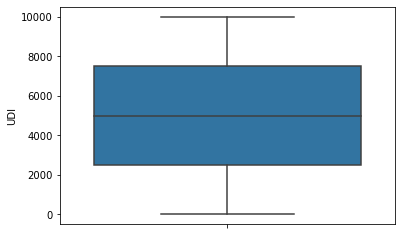

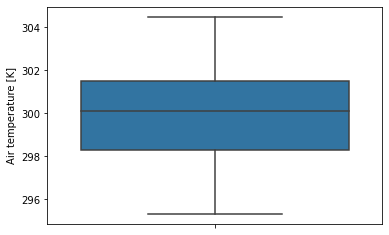

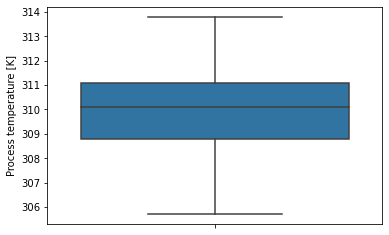

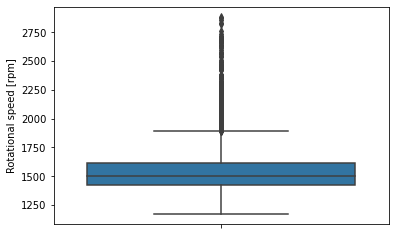

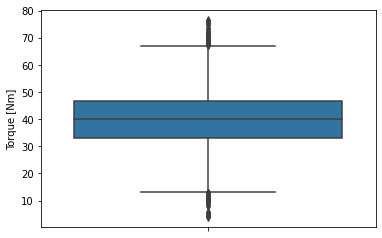

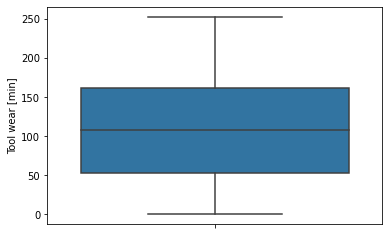

In [21]:
for aux in num:
  draw = sns.boxplot(y=df[aux], data=df, hue=df['Target'])
  draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
  plt.show()

Text(0.5, 1.05, 'Correlacion de Pearson variables numéricas')

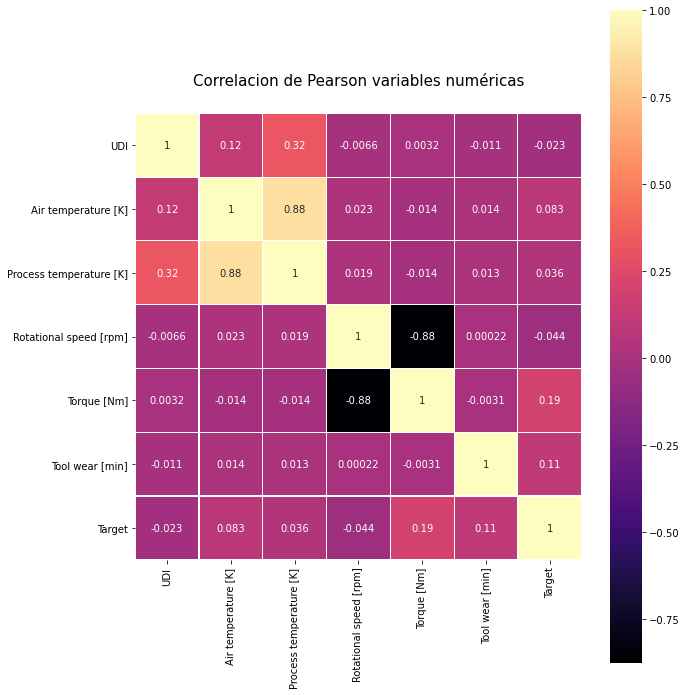

In [22]:
#Ploteamos un grafico de correlación
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="magma", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Correlacion de Pearson variables numéricas", y=1.05, size=15)